YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


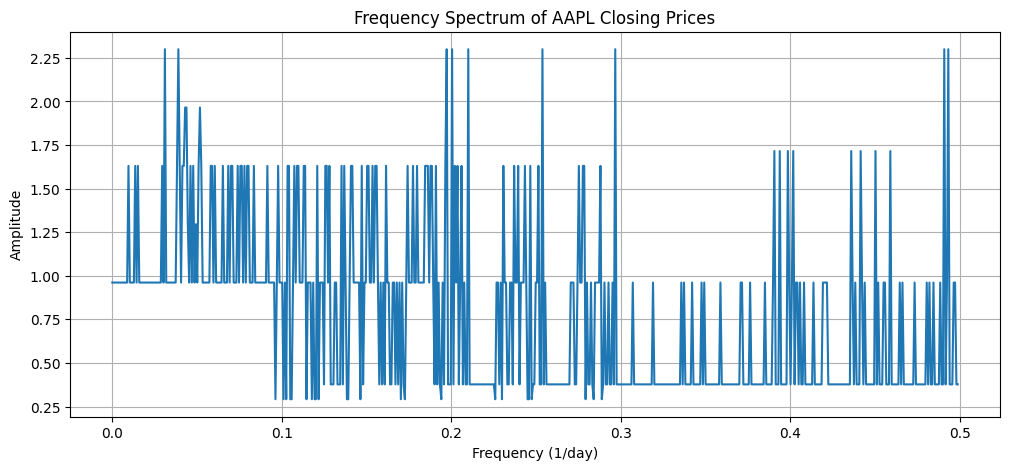

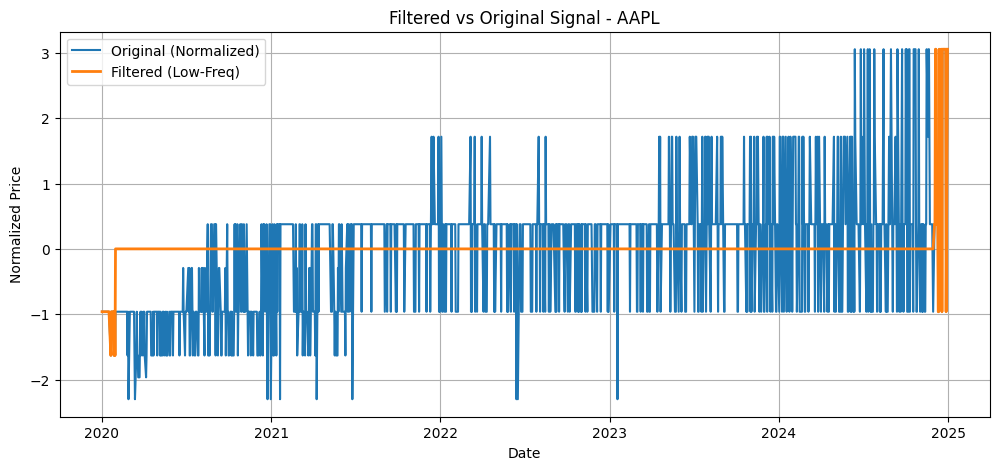

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Step 1: Download stock data
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
prices = data['Close'].dropna()

# Step 2: Detrend and normalize
detrended = signal.detrend(prices)
normalized = (detrended - np.mean(detrended)) / np.std(detrended)

# Step 3: Apply Fourier Transform
fft_result = np.fft.fft(normalized)
frequencies = np.fft.fftfreq(len(normalized), d=1)  # d=1 assumes daily sampling

# Step 4: Plot frequency spectrum
plt.figure(figsize=(12, 5))
n = len(frequencies)
plt.plot(frequencies[:n//2], np.abs(fft_result)[:n//2])
plt.title(f'Frequency Spectrum of {ticker} Closing Prices')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Step 5: Filter high frequencies (keep only first 20 components)
fft_filtered = fft_result.copy()
fft_filtered[20:-20] = 0  # Zero out high-frequency components

# Step 6: Reconstruct filtered signal
reconstructed = np.fft.ifft(fft_filtered).real

# Step 7: Plot original vs filtered
plt.figure(figsize=(12, 5))
plt.plot(prices.index, normalized, label='Original (Normalized)')
plt.plot(prices.index, reconstructed, label='Filtered (Low-Freq)', linewidth=2)
plt.title(f'Filtered vs Original Signal - {ticker}')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()
